# **Project Title - Google Play store apps exploratory data analysis**

**TODO** - The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

This project is part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). For this project, tools and technologies used are data cleaning, data manipulation, data visualization with python data analysis packages such as numpy, pandas, matplotlib, seaborn, etc.

## Downloading the Dataset

dataset can be downloaded from [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) on Kaggle

Here [opendatasets](https://pypi.org/project/opendatasets/) is used to download the dataset 

In [1]:
!pip install opendatasets

In [2]:
import opendatasets
opendatasets.download('https://www.kaggle.com/lava18/google-play-store-apps')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adityaphulallwar
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 116MB/s]

In [186]:
data_dir = 'google-play-store-apps'

In [187]:
import os
os.listdir(data_dir)

['googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'license.txt']

In [188]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [189]:
google_playstore_df = pd.read_csv(data_dir + '/googleplaystore.csv')

## Data Preparation and Cleaning

**TODO** - 
> - Most of the columns in the dataframe is of object type.
> - numerical values been inputed as '3M', '100K', '1000+' for millions and thousands. 
> - one of the row value is field with the invalid inputs. 
> - Convert "Last Updated" column to datetime object.
> - Handle missing value for the Type column.
> - Parse "Last Updated" into months and year.


In [190]:
# Check the google playstore apps dataset(df)
google_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [191]:
# Checking for the df shape
google_playstore_df.shape

(10841, 13)

In [192]:
# Checking for the df columns types
google_playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [193]:
# Checking for null values in the df
google_playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### **Review**
> field has only one invalid So it can be manually be fixed and convert its data type to numeric

In [194]:
google_playstore_df[google_playstore_df['Reviews'] == '3.0M']['Reviews']

10472    3.0M
Name: Reviews, dtype: object

In [195]:
google_playstore_df.loc[10472, 'Reviews'] = 3000000

In [196]:
google_playstore_df[google_playstore_df['Reviews'] == 3000000]['Reviews']

10472    3000000
Name: Reviews, dtype: object

In [197]:
google_playstore_df['Reviews'] = google_playstore_df['Reviews'].astype(np.float64)

In [198]:
google_playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Size
> - field contains **'Varies with device'** values so it be better to convert into **0** so it can help categorying
> - handling **M** and **k** values 
> - converting its datatype to numeric

In [199]:
google_playstore_df.loc[google_playstore_df['Size'] == 'Varies with device', 'Size'] = '0'

In [200]:
google_playstore_df[google_playstore_df['Size'] == '0'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639.0,0,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,0,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,0,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,0,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,0,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


In [201]:
google_playstore_df.loc[google_playstore_df['Size'] == '1,000+', 'Size'] = 1000

In [202]:
google_playstore_df[google_playstore_df['Size'] == 1000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [203]:
google_playstore_df['Size'] = (google_playstore_df['Size'].replace(r'[kM]+$', '', regex = True).astype(float) * \
                      google_playstore_df['Size'].str.extract(r'[\d\.]+([kM]+)', expand = False)
                      .fillna(1)
                      .replace(['k', 'M'], [10**3, 10**6 ]).astype(np.float64))

In [204]:
google_playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Installs
> - field has a value 'Free' instead of number of installations so it be better to guess the value to number of reviews
> - removing *'+'* in the values and converting its data type to numeric

In [205]:
google_playstore_df[google_playstore_df['Installs'] == 'Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [206]:
google_playstore_df.loc[google_playstore_df['Installs'] == 'Free', 'Installs'] = 3000000

In [207]:
google_playstore_df[google_playstore_df['Installs'] == 3000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000.0,3000000,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [208]:
google_playstore_df['Installs'] = google_playstore_df['Installs'].str.replace(r'\D', '').astype(np.float64) 

<ipython-input-208-5525c30f9f0d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  google_playstore_df['Installs'] = google_playstore_df['Installs'].str.replace(r'\D', '').astype(np.float64)


In [209]:
google_playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Price
> - field has a value *'Everyone'* dealing with it
> - Converting price values into analysible value
> - Converting into numeric data type

In [210]:
google_playstore_df[google_playstore_df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000.0,NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [211]:
google_playstore_df.loc[google_playstore_df['Price'] == 'Everyone', 'Price'] = 0

In [212]:
google_playstore_df[google_playstore_df['Price'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600000.0,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500000.0,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [213]:
google_playstore_df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                         3000000.0
Size                                               1000.0
Installs                                              NaN
Type                                                    0
Price                                                   0
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [214]:
google_playstore_df['Price'] = google_playstore_df['Price'].str.replace('[\$\,]', '').astype(np.float64)

<ipython-input-214-5e1c4aa1f05f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  google_playstore_df['Price'] = google_playstore_df['Price'].str.replace('[\$\,]', '').astype(np.float64)


In [215]:
google_playstore_df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

### Last Updated
> - Looks like row **10472** most of the values are not inputed proper so it be better to drop the row
> - Converting the column into datetime better for analysis


In [216]:
google_playstore_df[google_playstore_df['Last Updated'] == '1.0.19']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000.0,1000.0,NaN,0,NaN,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [217]:
google_playstore_df.drop(10472, inplace = True)

In [218]:
google_playstore_df.loc[google_playstore_df['Last Updated'] == '1.0.19', 'Last Updated'] = 'January 1, 1999'

In [219]:
google_playstore_df['Last Updated'] = pd.to_datetime(google_playstore_df['Last Updated'])

In [220]:
google_playstore_df.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object

In [221]:
google_playstore_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

### update year and update month
> extracting year and month from the **last updated** column 

In [222]:
google_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [223]:
google_playstore_df['update year'] = pd.DatetimeIndex(google_playstore_df['Last Updated']).year
google_playstore_df['update month'] = pd.DatetimeIndex(google_playstore_df['Last Updated']).month

### Rating and Type
> Handling missing value

In [224]:
google_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,update year,update month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [225]:
google_playstore_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
update year          0
update month         0
dtype: int64

In [226]:
google_playstore_df['Rating'].fillna(0, inplace = True)

In [227]:
google_playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
update year       0
update month      0
dtype: int64

In [228]:
google_playstore_df[google_playstore_df['Type'].isnull() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,update year,update month
9148,Command & Conquer: Rivals,FAMILY,0.0,0.0,0.0,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,2018,6


In [229]:
google_playstore_df.loc[google_playstore_df['Type'].isnull() == True, 'Type'] = 'Free'

In [230]:
google_playstore_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
update year       0
update month      0
dtype: int64

### Duplicates
> droping duplicate values from the dataframe

In [231]:
google_playstore_df.drop_duplicates(['App'],inplace=True)

In [232]:
len(google_playstore_df)

9659

In [233]:
google_playstore_df.to_csv('googleplaystorecleaned.csv')

## Exploratory Analysis and Visualization



In [234]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### Computing the mean, sum, range and other interesting statistics for numeric columns 

In [235]:

google_playstore_df.describe()

,Rating,Reviews,Size,Installs,Price,update year,update month
count,9659.000000,9.659000e+03,9.659000e+03,9.659000e+03,9659.000000,9659.000000,9659.000000
mean,3.541143,2.165926e+05,1.780444e+07,7.777507e+06,1.099299,2017.345688,6.364013
std,1.575733,1.831320e+06,2.149524e+07,5.375828e+07,16.852152,1.137600,2.659610
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2010.000000,1.000000
25%,3.600000,2.500000e+01,2.900000e+06,1.000000e+03,0.000000,2017.000000,5.000000
50%,4.200000,9.670000e+02,9.100000e+06,1.000000e+05,0.000000,2018.000000,7.000000
75%,4.500000,2.940100e+04,2.500000e+07,1.000000e+06,0.000000,2018.000000,8.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,2018.000000,12.000000


### Exploring the Size distribution 
**Note:** Varies values are converted into the 0 

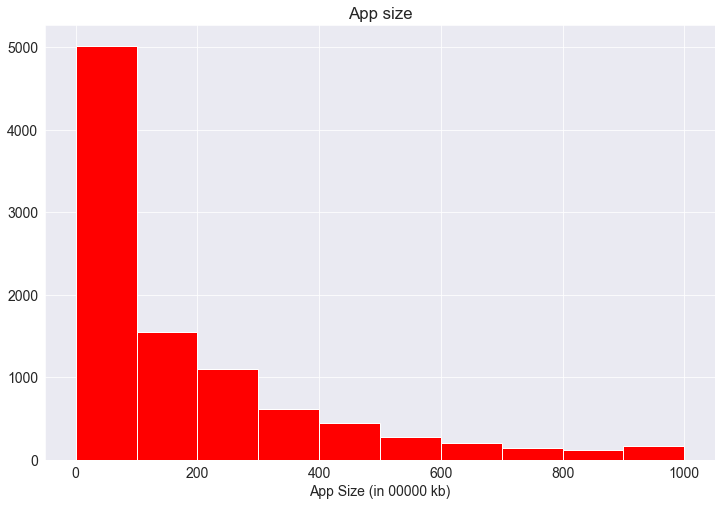

In [236]:
plt.figure(figsize = (12, 8))

plt.hist(google_playstore_df['Size'] / 100000, color = 'red')
plt.title('App size')
plt.xlabel('App Size (in 00000 kb)')
plt.show()

C:\Users\addy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


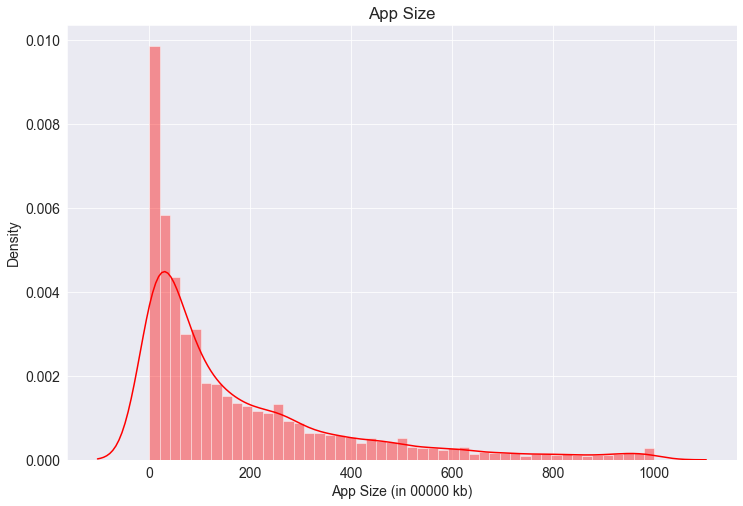

In [237]:
plt.figure(figsize = (12, 8))

sns.distplot(google_playstore_df['Size'] / 100000,
            color = 'red')

plt.title('App Size')
plt.xlabel('App Size (in 00000 kb)')
plt.show()

most of the Size of App are between "Varies with device" and 20 millions

### Checking App Rating Distribution 

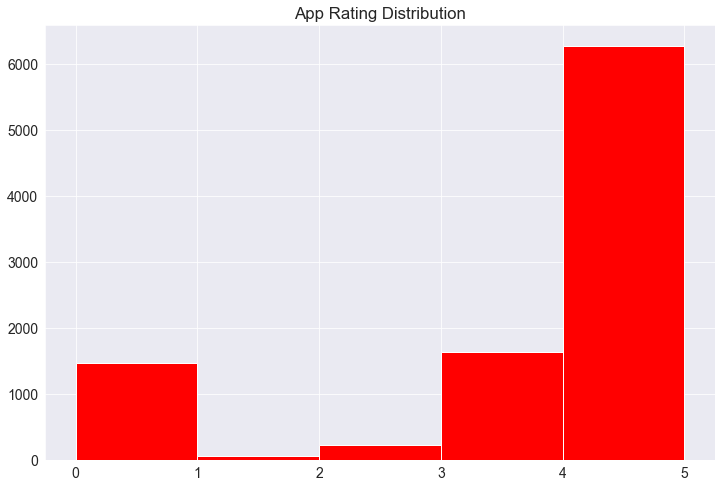

In [238]:
plt.figure(figsize = (12, 8))

plt.hist(google_playstore_df['Rating'],
             bins = 5,
            color = 'red')

plt.title('App Rating Distribution')
plt.show()

C:\Users\addy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


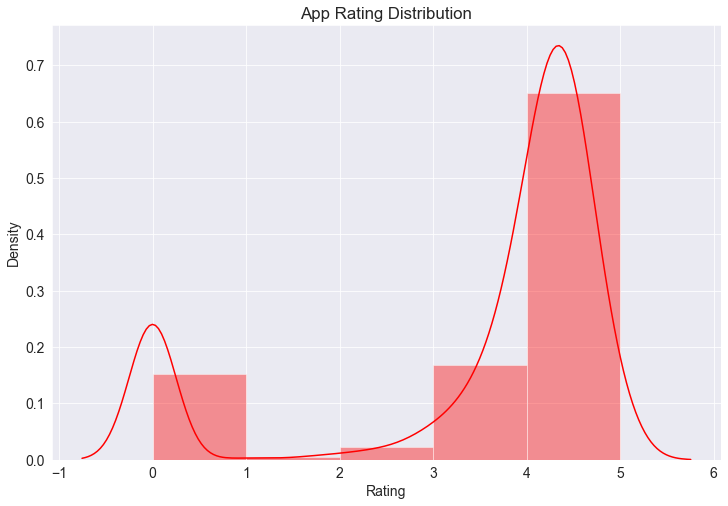

In [239]:
plt.figure(figsize = (12, 8))

sns.distplot(google_playstore_df['Rating'],
             bins = 5,
            color = 'red')

plt.title('App Rating Distribution')
plt.show()

Looks like most of the apps rating are in between 4 and 5

In [240]:
google_playstore_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### Categories Installations 

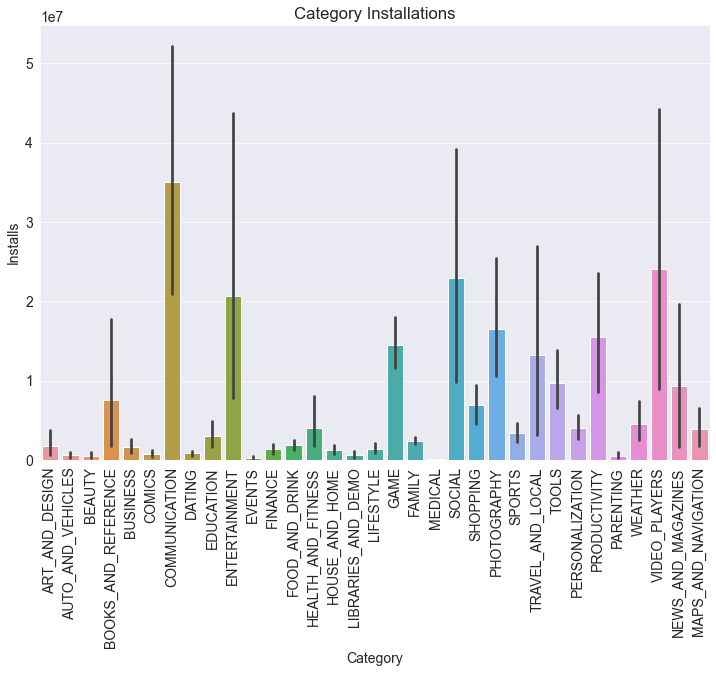

In [241]:
plt.figure(figsize = (12, 8))

sns.barplot(x = 'Category', y = 'Installs', data = google_playstore_df)

plt.title('Category Installations')
plt.xticks(rotation=90)
plt.show()

Communication , entertainment and social and video players apps have more installions than any other categories

### Categories size

<AxesSubplot:xlabel='Category'>

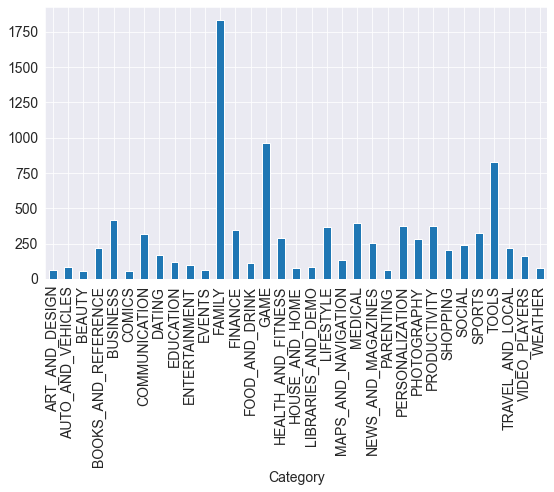

In [242]:
pd.DataFrame(google_playstore_df.groupby(['Category']).size()).plot(kind = 'bar', legend = False)

Looks like there are more of family type of apps in the app store

### Exploring the relation between Price and Installs

In [243]:
Non_free_df = google_playstore_df[google_playstore_df['Price'] > 0]

In [244]:
Non_free_df.describe()

,Rating,Reviews,Size,Installs,Price,update year,update month
count,756.000000,7.560000e+02,7.560000e+02,7.560000e+02,756.000000,756.000000,756.000000
mean,3.403175,8.724888e+03,1.722698e+07,7.587947e+04,14.045146,2016.679894,6.322751
std,1.780130,8.988612e+04,2.183246e+07,5.389844e+05,58.743615,1.554542,3.049101
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.990000,2011.000000,1.000000
25%,3.300000,6.000000e+00,1.800000e+06,1.000000e+02,1.490000,2016.000000,4.000000
50%,4.300000,8.800000e+01,7.350000e+06,1.000000e+03,2.990000,2017.000000,6.000000
75%,4.600000,1.213750e+03,2.500000e+07,1.000000e+04,4.990000,2018.000000,8.000000
max,5.000000,2.376564e+06,1.000000e+08,1.000000e+07,400.000000,2018.000000,12.000000


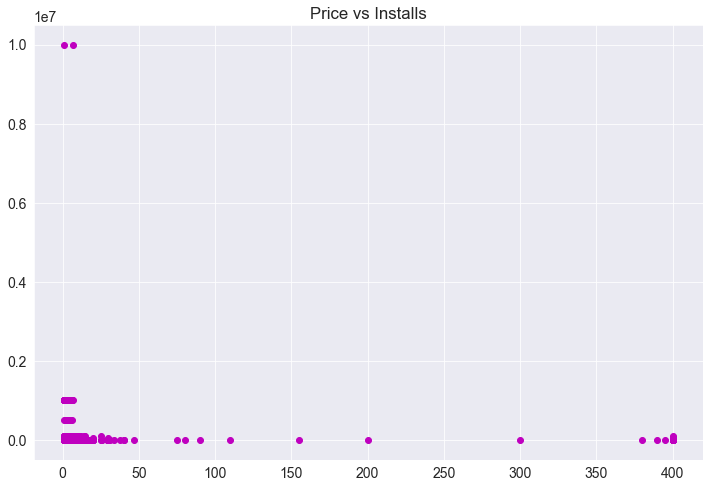

In [245]:
plt.figure(figsize = (12, 8))

plt.scatter(Non_free_df['Price'], 
            Non_free_df['Installs'], color = 'm')

plt.title('Price vs Installs')


plt.show()

In [246]:
np.corrcoef(Non_free_df['Price'], 
            Non_free_df['Installs'])

array([[ 1.        , -0.02152502],
       [-0.02152502,  1.        ]])

Looks like that there is no such strong relation between Price and Installations

### Exploring relation between Type and Installs

In [247]:
google_playstore_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

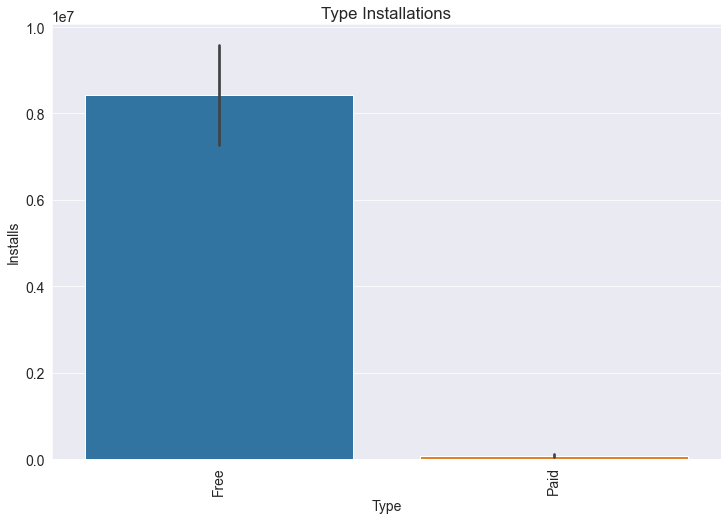

In [248]:
plt.figure(figsize = (12, 8))

sns.barplot(x = 'Type', y = 'Installs', data = google_playstore_df)

plt.title('Type Installations')
plt.xticks(rotation=90)
plt.show()

## Asking and Answering Questions

### Q.1 What percentage of Paid apps are the google play store apps

In [249]:
grp1 = google_playstore_df.groupby(['Type'])

In [250]:
grp1.count()['App']['Paid'] / (grp1.count()['App']['Free'] + grp1.count()['App']['Paid'])

0.07826897194326535

### Q.2 Which app has the highest cost ?

In [251]:
google_playstore_df[google_playstore_df['Price'] == 400]['App']

4367    I'm Rich - Trump Edition
Name: App, dtype: object

### Q.3 What is the number of apps that has installation over 100 millions

In [252]:
len(google_playstore_df[google_playstore_df['Installs'] > 100000000])

44

### Q.4 Which category of apps has over 100 millions installs

<AxesSubplot:xlabel='Category'>

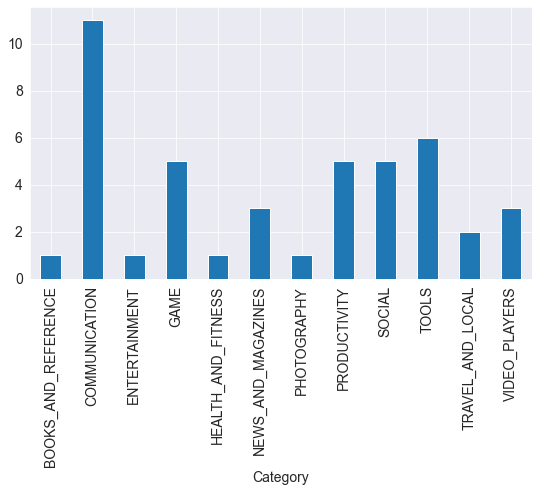

In [253]:
google_playstore_df[google_playstore_df['Installs'] > 100000000].groupby('Category').count()['App'].plot(kind = 'bar')

In [254]:
user_reviews = pd.read_csv(data_dir + "/googleplaystore_user_reviews.csv")

In [255]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Q.5 What is the Sentiment of '10 Best Foods for You'

<AxesSubplot:xlabel='App'>

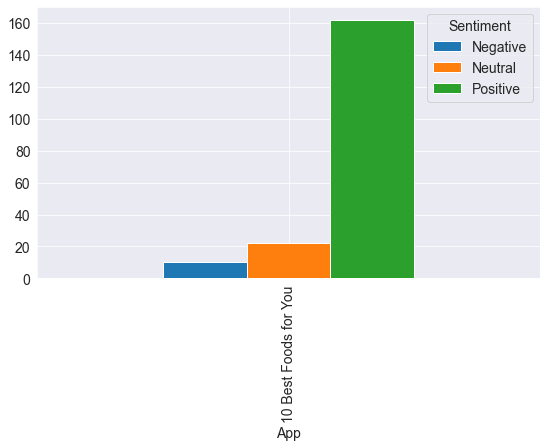

In [256]:
pd.crosstab(user_reviews[user_reviews['App'] == '10 Best Foods for You']['App'], user_reviews['Sentiment']).plot(kind = 'bar')

In [257]:
google_playstore_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'update year', 'update month'],
      dtype='object')

### Q.6 Which month has the most number of updates

<AxesSubplot:xlabel='update month'>

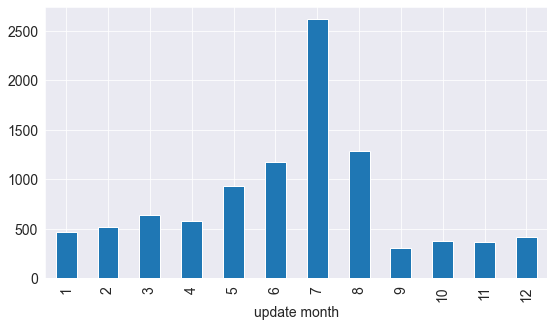

In [258]:
google_playstore_df.groupby("update month").count()['App'].plot(kind = 'bar')

In [259]:
(google_playstore_df['Installs'] * google_playstore_df['Price']).sort_values(ascending=False)

2241     69900000.0
5351     39999000.0
5356     19999500.0
4034      9900000.0
7417      6990000.0
            ...    
4079            0.0
4080            0.0
4081            0.0
4082            0.0
10840           0.0
Length: 9659, dtype: float64

In [260]:
(google_playstore_df['Installs'] * google_playstore_df['Price']).max()

69900000.0

In [261]:
gps_df = google_playstore_df['App']

In [262]:
gps_df.head()

0       Photo Editor & Candy Camera & Grid & ScrapBook
1                                  Coloring book moana
2    U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                Sketch - Draw & Paint
4                Pixel Draw - Number Art Coloring Book
Name: App, dtype: object

In [263]:
len(google_playstore_df) == len(gps_df)

True

In [264]:
google_playstore_df['Earned'] = google_playstore_df['Installs'] * google_playstore_df['Price']

In [265]:
google_playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,update year,update month,Earned
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6,0.0


### Q.7 Which app has earned the highest and what is the amount ?

In [266]:
google_playstore_df[ google_playstore_df['Earned'] ==  google_playstore_df['Earned'].max()][['App', 'Earned']]

,App,Earned
2241,Minecraft,69900000.0


## Inferences and Conculsion

- Most of the  values Size of Apps are "Varies with device" or are less than 20mb.

- Most of the App ratings are in between 4 and 5.

- Communication, entertainment, social and video players apps have more installations than any other categories.

- There are more Family type of apps in the google playstore.

- There no such strong relation to indicate that Price of app effect number of installations but it does indicating weak negative relation.

- There are far more Free apps and paid apps.

- Only 7% of apps are Paid ones.

- "I'm Rich - Trump Edition" App is the most costliest app in the Google PlayStore.

- There are 44 apps that has installations over 100 millions.

- Communication type of apps has the most number of 100+ milions installations. 

- Looks like people really enjoyed and gave mostly positive review to "10 Best Foods for You".

- July has most number of updates than any other months. 

- Minecraft App has earned the highest amount over 69,900,000.


### References and Future Work

- Could Perform clustering to know what are the different groups of apps.
- Statistical Analysis to  compute hypothesis and derive more insight.

**References**
- Python for Data Analysis (book)
- stackoverflow for queries e.g. [unwanted-parts](https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380), [convert k and M to] (https://stackoverflow.com/questions/39684548/convert-the-string-2-90k-to-2900-or-5-2m-to-5200000-in-pandas-dataframe)

- offical libraries documents
[pandas](https://pandas.pydata.org/docs/)
[matplotlib](https://matplotlib.org/stable/index.html)
[numpy](https://numpy.org/)
[seaborn](https://seaborn.pydata.org/api.html)


In [267]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
